# Libraries

In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
plt.style.use('dark_background')

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_dark"
from plotly.subplots import make_subplots

In [3]:
train = pd.read_csv(os.path.join('data','train.csv'))
test = pd.read_csv(os.path.join('data','test.csv'))
submission = pd.read_csv(os.path.join('data','sample_submission.csv'))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   time           float64
 1   signal         float64
 2   open_channels  int64  
dtypes: float64(2), int64(1)
memory usage: 114.4 MB


In [5]:
train.describe()

,time,signal,open_channels
count,5.000000e+06,5.000000e+06,5.000000e+06
mean,2.500001e+02,1.386246e+00,2.726043e+00
std,1.443376e+02,3.336219e+00,2.665051e+00
min,1.000000e-04,-5.796500e+00,0.000000e+00
25%,1.250001e+02,-1.594800e+00,1.000000e+00
50%,2.500000e+02,1.124000e+00,2.000000e+00
75%,3.750000e+02,3.690100e+00,4.000000e+00
max,5.000000e+02,1.324400e+01,1.000000e+01


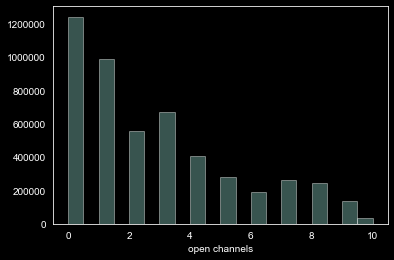

In [26]:
sns.distplot(train['open_channels'], kde=False, bins=20, axlabel='open channels')
plt.show()

There is a high class imbalance with the majority of samples having no open channels or only one, this has to be taken into consideration for model building

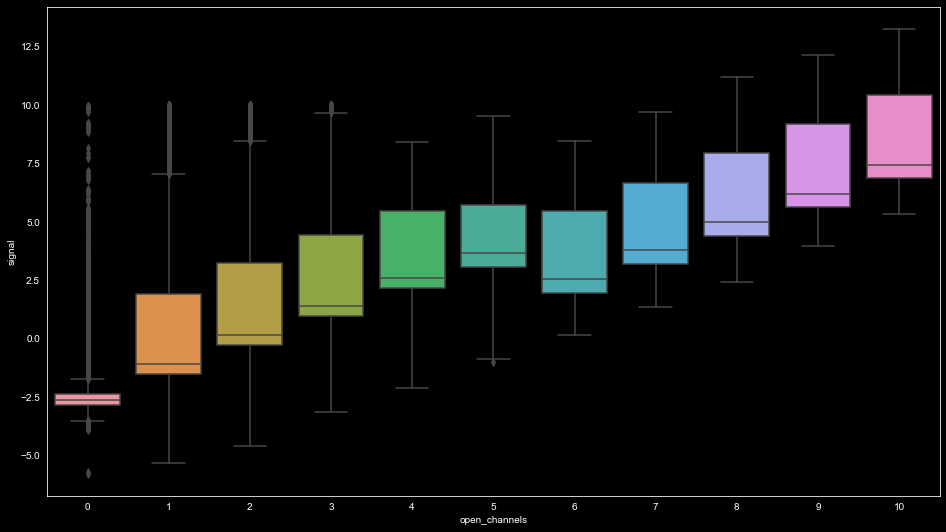

In [40]:
plt.figure(figsize=(16,9))
sns.boxplot(x='open_channels', y='signal', data=train)
plt.show()

We can have not so bad results by thresholding on the Q1 and Q3 of each class